In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
# データ取得
iris = load_iris()

# ndarrayからdfに変換
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


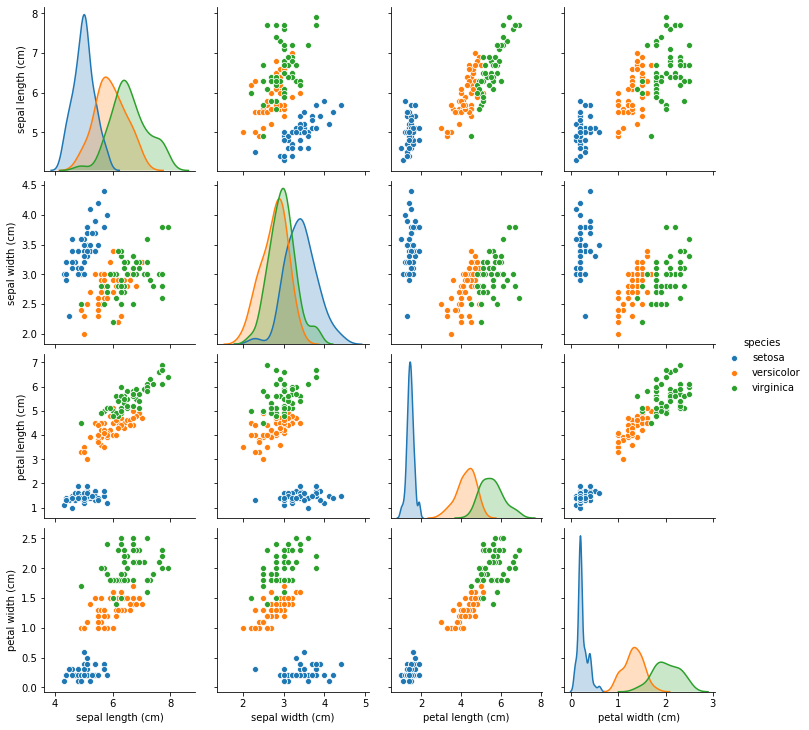

In [3]:
sns.pairplot(df, hue='species')

In [4]:
# hold-outでデータを分割する
X = df.loc[:, df.columns!='species']
y = df['species'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

print(len(X_train),len(X_test))

105 45


In [5]:
# 学習
model = LogisticRegression(penalty='none')
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
# 検証データ
X_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


In [7]:
# 優先度最高ラベル
model.predict(X_test)

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa'], dtype=object)

In [11]:
# 分類結果の確率
model.predict_proba(X_test)

df = pd.DataFrame(model.predict_proba(X_test),
                  columns = model.classes_)
df.head()

,setosa,versicolor,virginica
0,0.0,3.175561e-259,1.000000e+00
1,0.0,1.000000e+00,2.663255e-242
2,1.0,0.000000e+00,0.000000e+00
3,0.0,8.281212e-194,1.000000e+00
4,1.0,1.680899e-284,0.000000e+00


In [22]:
# モデルの係数
print('intercept_（切片）：{} coef_（傾き）：{} '.format(model.intercept_, model.coef_))

# 切片：setosa、versicolor、virginicaの順
# 傾き：setosa（sepal length、sepal width、petal length、petal width）
# 　　　versicolor（sepal length、sepal width、petal length、petal width）
# 　　　virginica（sepal length、sepal width、petal length、petal width）の順

intercept_（切片）：[  80.23761557  129.79120367 -210.02881924] coef_（傾き）：[[ 155.59730534  358.73832216 -523.93811084 -248.11591884]
 [ 118.20298322  -15.08081923  -41.54669853  -91.11018182]
 [-273.80028856 -343.65750293  565.48480937  339.22610067]] 
